In [2]:
from PIL import Image
import numpy as np 
import math
import matplotlib.pyplot as plt

In [3]:
def getGradMag(img, kernel):
    
    img = np.array(img)
    gradMag = np.zeros(img.shape)
    
    s = kernel.shape[0]
    r = math.floor(s/2)
    
    #convolve
    for i in range (r,img.shape[0]-r):
        for j in range (r,img.shape[1]-r):
            val = 0
            for k in range(-r, r+1):
                for l in range(-r,r+1):
                    val += img[i+k][j+l]*kernel[k+r][l+r]

            gradMag[i][j] = val
            
    return gradMag
    

In [38]:
def sharpen(img, kernel):
    
    sharpenedImg = np.array(img, dtype=np.float64)
    
    grad = getGradMag(img, kernel)    
    
    sharpenedImg = sharpenedImg + 0.03*grad
        
    return sharpenedImg
    


In [39]:
img = Image.open("Cameraman.png")
kernel = np.array([ [-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
s = sharpen(img, kernel)

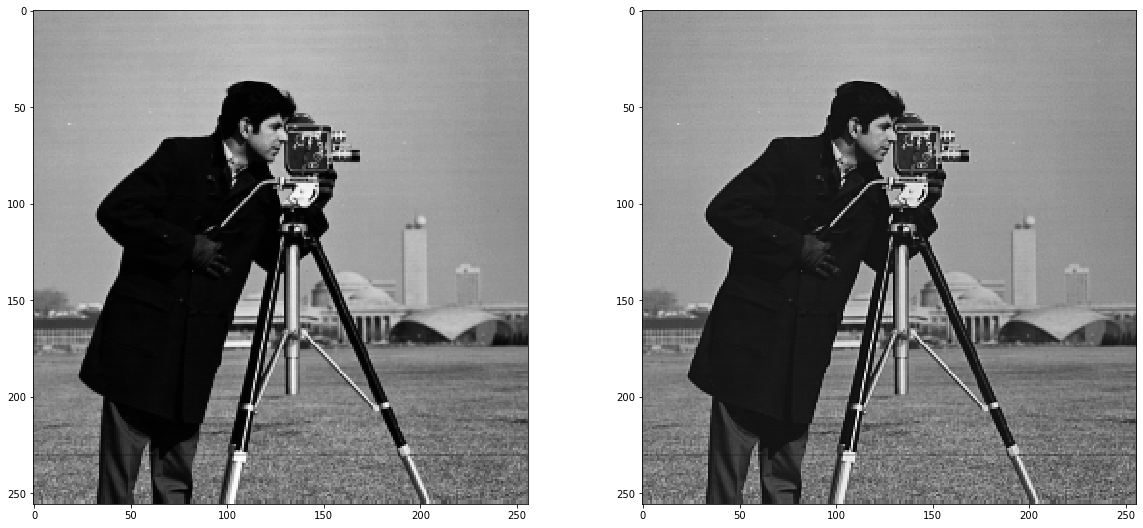

In [40]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(2,2,2)
plt.imshow(s, cmap="gray")